In [1]:
!pip install numpy Pillow Matplotlib pandas seaborn scikit-learn requests scikit-image mlxtend prefixspan scikit-fuzzy umap-learn openpyxl stanza torch torchvision tesseract pytesseract nltk wordcloud spacy tensorflow==2.19.0 tensorflow-datasets opencv-python ucimlrepo nbconvert

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 MB 15.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 75.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 36.2 MB/s eta 0:00:00
  Created wheel for prefixspan: filename=prefixspan-0.5.2-py3-none-any.whl size=11215 sha256=7ac44a93abc8eef312b67f560a8498ea72437ac2ede0702306921b894f124574
  Stored in directory: /root/.cache/pip/wheels/72/36/65/f9e2bbe4998ab4cdf6e7a015f38bdbb6925301dcf2cce34a88
  Created wheel for tesseract: filename=tesseract-0.1.3-py3-none-any.whl size=45562552 sha256=3eb31e3121000c3e2668306436ae53886a87e03728f39d0c0a49987bd28120cb
  Stored in directory: /root/.cache/pip/wheels/13/1f/8e/2d6c0e358fd6d01ca80ecd9185a374bcda35

In [2]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 45ms/step - loss: 0.0802 - val_loss: 0.0264
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0244 - val_loss: 0.0179
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - loss: 0.0171 - val_loss: 0.0140
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - loss: 0.0137 - val_loss: 0.0126
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0118 - val_loss: 0.0109
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0105 - val_loss: 0.0096
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0096 - val_loss: 0.0091
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.0090 - val_loss: 0.0085
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0084 - val_loss: 0.0082
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0080 - val_loss: 0.0078
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0076 - val_loss: 0.0074
Epoch 12/20
235/235 ━━━━━━━━━━━

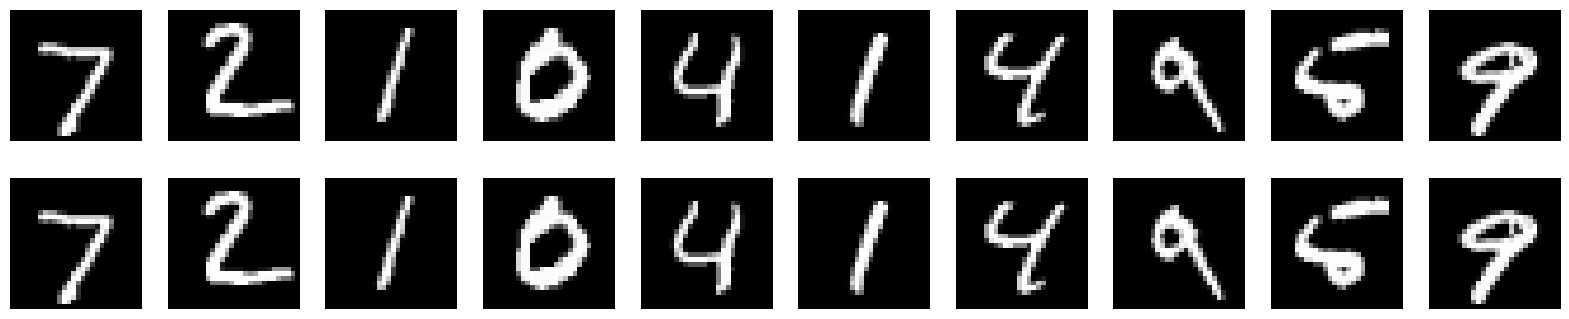

In [3]:
# trabajamos con mnist
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

# normalizamos nuestros valores
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# redimensionamos nuestras imagenes de (28*28) -- vector de 784
x_train = x_train.reshape(len(x_train), 28 * 28)
x_test = x_test.reshape(len(x_test), 28 * 28)

input_dim = 28 * 28  # tamano de las imagenes

# codificador (reduce la dimensionalidad)
encoder = keras.Sequential(
    [
        layers.Dense(512, activation="relu"),
        layers.Dense(256, activation="relu"),
        layers.Dense(128, activation="relu"),
        layers.Dense(64, activation="relu"),
    ]
)

# Decodificador (reconstruye la imagen)
decoder = keras.Sequential(
    [
        layers.Dense(128, activation="relu", input_shape=(64,)),
        layers.Dense(256, activation="relu"),
        layers.Dense(512, activation="relu"),
        layers.Dense(input_dim, activation="sigmoid"),  # salida entre 0 y 1
    ]
)

# uno el encoder con el decoder
autoencoder = keras.Sequential([encoder, decoder])


# compilamos y despues entrenamos
autoencoder.compile(optimizer="adam", loss="mse")
autoencoder.fit(
    x_train, x_train, epochs=20, batch_size=256, validation_data=(x_test, x_test)
)

encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)


# mostramos algunas imagenes que el modelo logro reconstruir
n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
    # aca nuestra imagen original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.axis("off")

    # aca nuestras imagenes reconstruidas
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.axis("off")

plt.show()